In [11]:
!python /home/jovyan/PyInpaint/setup.py sdist bdist_wheel

running sdist
running egg_info
creating PyInpaint.egg-info
writing PyInpaint.egg-info/PKG-INFO
writing dependency_links to PyInpaint.egg-info/dependency_links.txt
writing entry points to PyInpaint.egg-info/entry_points.txt
writing requirements to PyInpaint.egg-info/requires.txt
writing top-level names to PyInpaint.egg-info/top_level.txt
writing manifest file 'PyInpaint.egg-info/SOURCES.txt'
reading manifest file 'PyInpaint.egg-info/SOURCES.txt'
writing manifest file 'PyInpaint.egg-info/SOURCES.txt'

running check
creating PyInpaint-1.2.0
creating PyInpaint-1.2.0/PyInpaint.egg-info
copying files to PyInpaint-1.2.0...
copying PyInpaint.egg-info/PKG-INFO -> PyInpaint-1.2.0/PyInpaint.egg-info
copying PyInpaint.egg-info/SOURCES.txt -> PyInpaint-1.2.0/PyInpaint.egg-info
copying PyInpaint.egg-info/dependency_links.txt -> PyInpaint-1.2.0/PyInpaint.egg-info
copying PyInpaint.egg-info/entry_points.txt -> PyInpaint-1.2.0/PyInpaint.egg-info
copying PyInpaint.egg-info/requires.txt -> PyInpaint-1.2.

In [13]:
!pip install dist/PyInpaint-1.2.0-py3-none-any.whl

Processing ./dist/PyInpaint-1.2.0-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 24.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: PyInpaint
    Found existing installation: pyinpaint 1.0.0
    Uninstalling pyinpaint-1.0.0:
      Successfully uninstalled pyinpaint-1.0.0


In [17]:
from pyinpaint.inpaint import Inpainting

from matplotlib import pyplot as plt

In [18]:
def show_images(org_img, mask, inpainted_img):
    org_img = plt.imread(org_img)
    org_img = (org_img - org_img.min()) /(org_img.max() - org_img.min())
    mask = plt.imread(mask)
    f = plt.figure(figsize=(20,20))
    f.add_subplot(1,3,1)
    plt.imshow(org_img, cmap="gray")
    plt.axis("off")
    plt.title("ORIGINAL")
    f.add_subplot(1,3,2)
    plt.imshow((org_img.T * mask.T).T, cmap="gray")
    plt.axis("off")
    plt.title("MASKED")
    f.add_subplot(1,3,3)
    plt.imshow(inpainted_img, cmap="gray")
    plt.axis("off")
    plt.title("INPAINTED")
    #plt.savefig("out.jpg",bbox_inches="tight")
    plt.show

In [20]:
org_img = "../data/lincoln.png"
mask = "../data/lincoln_mask.png"
inpaint = Inpainting(org_img, mask, 7)

In [21]:
inpainted_img = inpaint()

# of pixels to be inpainted are 1821: 100%|██████████|1821/1821


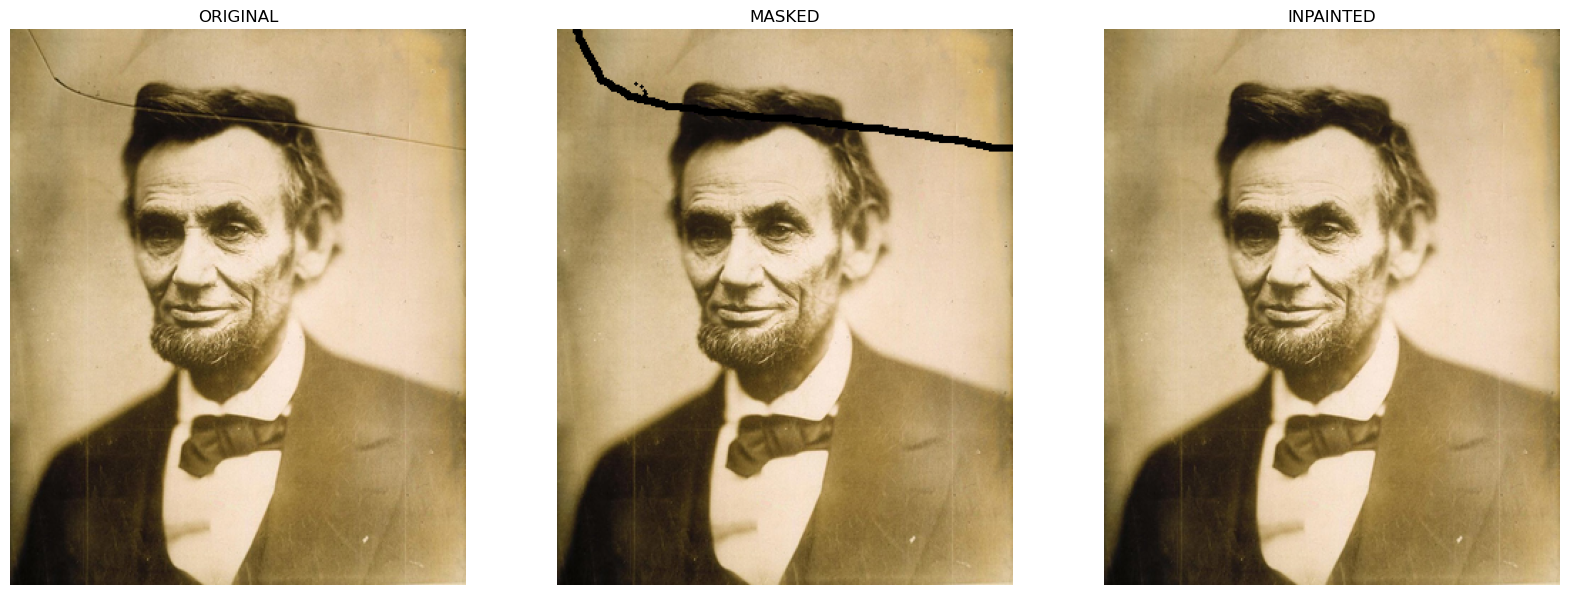

In [22]:
show_images(org_img, mask, inpainted_img)

# of pixels to be inpainted are 11082: 100%|██████████|11082/11082


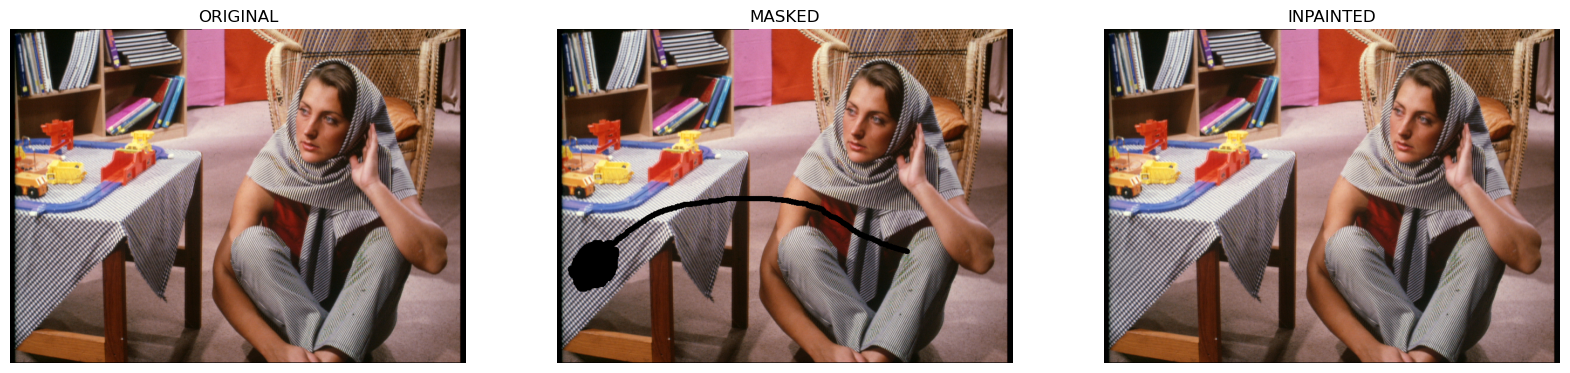

In [35]:
org_img = "../data/barbara.jpg"
mask = "../data/barbara_mask.png"
inpaint = Inpainting(org_img, mask, ps=9)
inpainted_img = inpaint(k_boundary=8, k_search=1000, k_patch=7)
show_images(org_img, mask, inpainted_img)

# of pixels to be inpainted are 5721: 100%|██████████|5721/5721


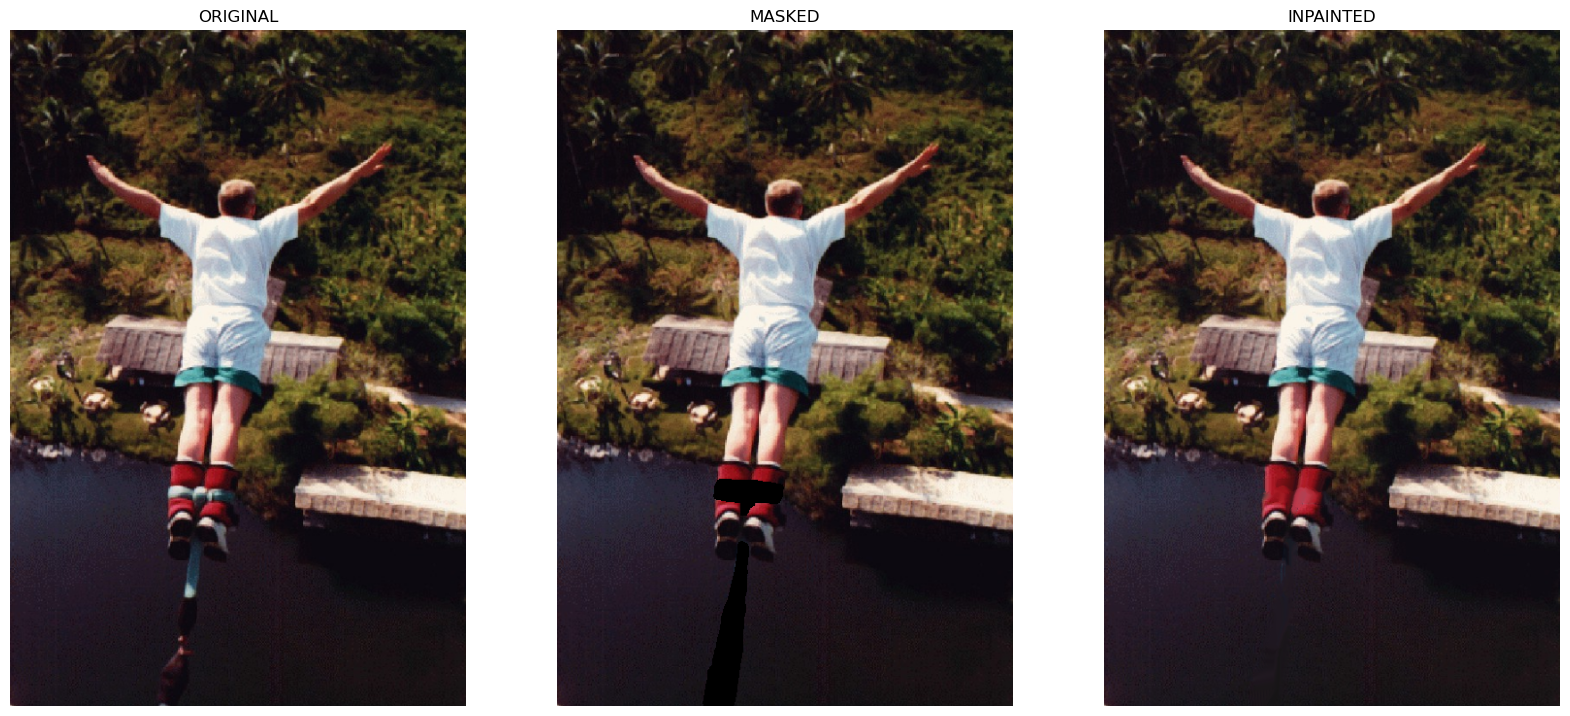

In [34]:
org_img = "../data/fly.png"
mask = "../data/fly_mask.png"
inpaint = Inpainting(org_img, mask, ps=13)

inpainted_img = inpaint(k_boundary=4, k_search=1000, k_patch=5)

show_images(org_img, mask, inpainted_img)